In [23]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [16]:
!kaggle datasets download prishasawhney/mushroom-dataset

Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset
License(s): other
mushroom-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
with ZipFile("mushroom-dataset.zip", "r") as obj:
    obj.extractall()

In [18]:
data = pd.read_csv("mushroom_cleaned.csv")
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [19]:
for col in data.columns:
    print(col, data[col].isna().sum())

cap-diameter 0
cap-shape 0
gill-attachment 0
gill-color 0
stem-height 0
stem-width 0
stem-color 0
season 0
class 0


## Scaling is not required for Naive Bayes Classifier

In [20]:
x = data.drop(columns='class',axis=1)
y = data['class']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [25]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.6338484315721292

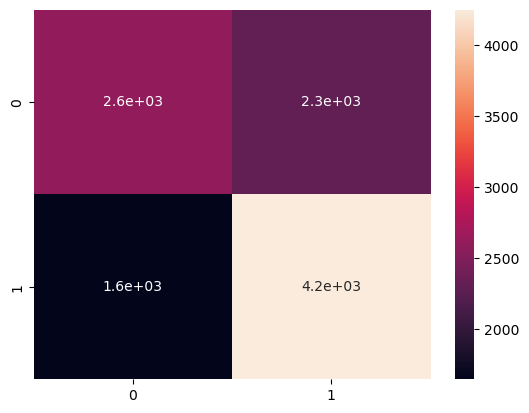

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig("Confusion Matrix for Naive Bayes")